# Creazione di Particelle e Risonanze

In questo notebook saranno calcolati i valori di massa invariante per alcune coppie di muoni rilevati in CMS. Sarà fatto un istogramma con i valori di massa invariante calcolati. Infine l'istogramma verrà fittato con una __Breit-Wigner__. Con il fit della Breit-Wigner sarà possibile determinare la massa e il tempo di vita del __bosone Z__.

## Creare l'istogramma delle masse invarianti

Facciamo un istogramma dai valori di massa invariante calcolati. L'istogramma descrive come i valori sono distribuiti, cioè quanti valori ci sono stati in ogni bin dell'istogramma. 

#### Creare l'istogramma
Gli istogrammi possono essere creati in Python con il modulo _matplotlib.pyplot_ che è stato importato prima e chiamato _plt_. Con la funzione `plt.hist()` è possibile creare un istogramma dando diversi parametri all'interno delle parentesi. Questi parametri possono essere esaminati da https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html.

Ora sono necessari solo i primi tre parametri: una variabile dai cui valori viene creato l'istogramma (_x)_, il numero di bins (_bins_) e l'intervallo inferiore e superiore dei bins (_range_).

Scrivete un codice che crei un istogramma a partire dai valori di massa invariante che sono stati calcolati. Poiché questo esercizio si concentra sul __bosone Z__, impostate saggiamente l'intervallo per ottenere i valori vicini alla massa del __bosone Z__. 

Prova qual è il numero di bins ottimale per fare un istogramma chiaro. Puoi provare diversi valori e vedere come influiscono sull'istogramma.

Nel codice ci sono già delle linee per nominare gli assi e il titolo dell'istogramma. 


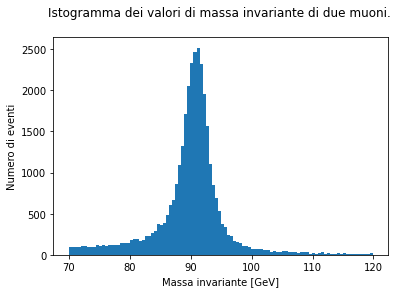

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#importiamo i dati dei processi con due muoni
ds = pd.read_csv('DoubleMuRun2011A.csv')

#otteniamo la massa invariante degli stessi
invariant_mass = ds.M

# Write down there a code that will create the histogram.
lowerlimit = 70
upperlimit = 120
bins = 100

# Selezioniamo i valori di massa invariante che sono all'interno dei limiti.
limitedmasses = invariant_mass[(invariant_mass > lowerlimit) & (invariant_mass < upperlimit)]

#Creiamo un istogramma dei valori selezionati.
istogramma = plt.hist(limitedmasses, bins=bins)


# Diamo un nome agli assi e al titolo
plt.xlabel('Massa invariante [GeV]')
plt.ylabel('Numero di eventi')
plt.title('Istogramma dei valori di massa invariante di due muoni. \n')
plt.show()


### Domanda 1

Descrivi l'istogramma. Quali informazioni se ne possono ottenere?

## Fit dell'istogramma

Per ottenere informazioni sulla massa e sul tempo di vita della risonanza rilevata, una funzione che descrive la distribuzione delle masse invarianti deve essere adattata ai valori dell'istogramma. Nel nostro caso i valori seguono una distribuzione di Breit-Wigner:

$$
N(E) = \frac{K}{(E-M)^2 + \frac{\Gamma^2}{4}},
$$

dove $E$ è l'energia, $M$ il massimo della distribuzione (uguale alla massa della particella che viene rilevata nella risonanza), $Gamma$ l'ampiezza completa a metà massimo (FWHM) o la larghezza di decadimento della distribuzione e $K$ una costante.

L'ampiezza del decadimento  $\Gamma$ e il tempo di vita $\tau$ della particella rilevata nella risonanza sono correlati nel modo seguente:

$$
\Gamma \equiv \frac{hbar}{\tau},
$$

dove $\hbar$ è la costante di Planck ridotta.

Con il codice seguente è possibile ottimizzare una funzione che rappresenta la distribuzione di Breit-Wigner ai valori dell'istogramma. La funzione è già scritta nel codice. Il vostro compito è ora quello di capire quali potrebbero essere approssimativamente i valori del massimo della distribuzione $M$ e la larghezza completa a metà della distribuzione $Gamma$. L'istogramma che è stato creato prima vi aiuterà in questo compito.

Scrivete queste ipotesi iniziali nel codice nella linea `initials = [#IL VALORE INIZIALE PER GAMMA, #IL VALORE INIZIALE PER M, -2, 200, 13000]`. In altre parole sostituite i due commenti in quella linea con i valori che avete ricavato.

Notate che le ipotesi iniziali per i parametri _a, b_ e _A_ sono già state date. Altri commenti nel codice possono essere lasciati intatti. Da essi è possibile ottenere informazioni su ciò che sta accadendo nel codice.

Dopo aver eseguito il codice Jupyter stamperà i valori dei diversi parametri come risultato dell'ottimizzazione. Anche le incertezze dei valori e un grafico della funzione adattata sono stampati. Le incertezze saranno ricevute dalla matrice di covarianza che la funzione di adattamento `curve_fit` restituirà.


τ =  0.22825229394190846

M =  90.90527652651907

a =  -3.009651576337015

b =  258.7752585677961

A =  7244.196888917491


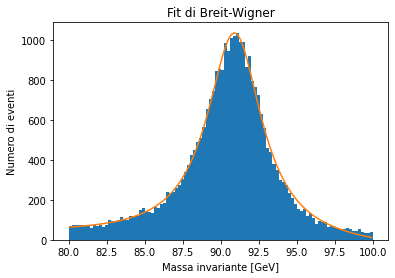

In [4]:
%matplotlib inline
import numpy as np

# Limitiamo il fit vicino al picco dell'istogramma.
lowerlimit = 80
upperlimit = 100
bins = 100

# Selezioniamo i valori di massa invariante che sono all'interno dei limiti.
limitedmasses = invariant_mass[(invariant_mass > lowerlimit) & (invariant_mass < upperlimit)]

#Creiamo un istogramma  per i valori selezionati.
istogramma = plt.hist(limitedmasses, bins=bins, range=(lowerlimit,upperlimit))

# Nell'asse y il numero degli eventi per ogni bin (può essere ottenuto dalla variabile istogramma).
# Nell'asse delle x i valori centrali dei bin.
y = istogramma[0]
x = 0.5*( istogramma[1][0:-1] + istogramma[1][1:] )

# Definiamo una funzione che descriva la distribuzione di Breit-Wigner per il fit.
# E è l'energia, gamma è la larghezza del decadimento, M il massimo della distribuzione
# e a, b e A diversi parametri che sono usati per notare l'effetto
# degli eventi di sfondo per l'adattamento.
def breitwigner(E, gamma, M, a, b, A):
    return a*E+b+A*( (2*np.sqrt(2)*M*gamma*np.sqrt(M**2*(M**2+gamma**2)))/(np.pi*np.sqrt(M**2+np.sqrt(M**2*(M**2+gamma**2)))) )/((E**2-M**2)**2+M**2*gamma**2)

# Valori iniziali per l'ottimizzazione nel seguente ordine:
# gamma (la larghezza completa a metà altezza (FWHM) della distribuzione)
# M (il massimo della distribuzione)
# a (la pendenza che viene utilizzata per notare l'effetto dello sfondo)
# b (l'intercetta y che si usa per notare l'effetto dello sfondo)
# A (l'"altezza" della distribuzione di Breit-Wigner)
iniziali = [100, 80, -2, 200, 13000]

# Importiamo il modulo che viene utilizzato nell'ottimizzazione, eseguiamo l'ottimizzazione
# e calcoliamo le incertezze dei parametri ottimizzati.
from scipy.optimize import curve_fit
    
params, covariance = curve_fit(breitwigner, x, y, p0=iniziali)
errore = np.sqrt(np.diag(covariance))

    
gamma = params[0]
M = params[1]
a = params[2]
b = params[3]
A = params[4]
    
print("\n\u03C4 = ", 1./gamma)
print("\nM = ", M)
print("\na = ", a)
print("\nb = ", b)
print("\nA = ", A)

plt.plot(x, breitwigner(x, gamma, M, a, b, A))
plt.xlabel('Massa invariante [GeV]')
plt.ylabel('Numero di eventi')
plt.title('Fit di Breit-Wigner')
plt.show()


#### Ocho 1:

Se la funzione adattata non segue bene l'istogramma, torna indietro e controlla i valori di partenza.

#### Ocho 2:

Nel fit viene preso in considerazione il cosiddetto background della distribuzione di massa. Il background consiste fondamentalmente coppie di muoni che provengono da altri processi di decadimento che dal decadimento del bosone Z. Il background è preso in considerazione nel codice nella linea che segue il comando `def breitwigner`. Il fit è adattato al background con il termine `a*E+b`, corrispondente ad un background lineare.

## Analisi dell'istogramma

### Domanda 2

Cosa puoi dire sull'aspetto del bosone Z sulla base dell'istogramma e della funzione adattata?

Puoi definire la massa dello Z con l'incertezza? Come?

Eventualmente, spiega le tue risposte con l'aiuto di fonti esterne.

### Domanda 3

Calcola il tempo di vita $\tau$ del bosone Z usando il fit.

Confronta il valore calcolato con il tempo di vita noto del bosone Z. Cosa noti? Cosa potrebbe spiegare le tue osservazioni?


**************************************************



# E QUI LE NOSTRE STRADE SI DIVIDONO... AD MAIORA!

<img src="https://i.imgur.com/Be6cpLh.gif"
alt="Coding">